In [1]:
import numpy as np
import pylab as pl

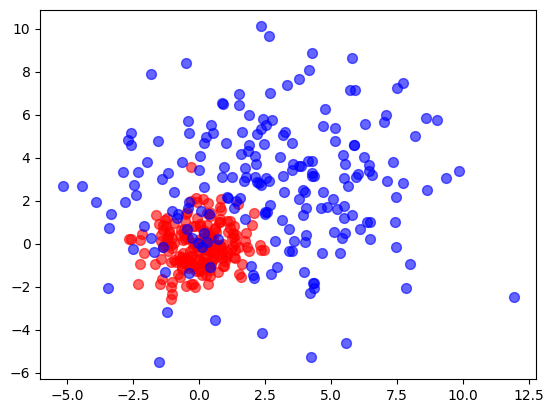

In [2]:
n = 200
a = np.random.normal(loc=0, scale=1, size=(n, 2))
b = np.random.normal(loc=3, scale=3, size=(n, 2))
pl.scatter(a[:, 0], a[:, 1], c='red', s=50, alpha=0.6)
pl.scatter(b[:, 0], b[:, 1], c='blue', s=50, alpha=0.6)


In [3]:
X = np.vstack([a, b])
print(X.shape)
y = np.hstack([np.zeros(n), np.ones(n)])
print(y.shape)

(400, 2)
(400,)


(500, 2)


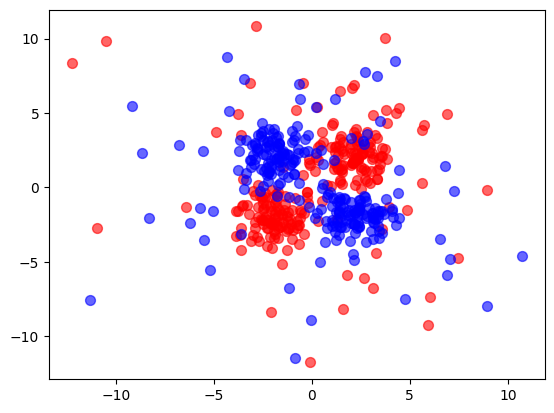

In [21]:
n = 100
a = np.random.normal(loc=-2, scale=1, size=(n*4,1))
b = np.random.normal(loc=2, scale=1, size=(n*4,1))
c = 5*np.random.randn(100,2)
#print np.hstack([a[:n],a[n:2*n]]).shape
X = np.vstack([np.hstack([a[:n],a[n:2*n]]),np.hstack([b[:n],b[n:2*n]]),c,np.hstack([a[2*n:3*n],b[2*n:3*n]]),np.hstack([b[3*n:],a[3*n:]])])
print(X.shape)
y = np.hstack([np.zeros(2*n+50), np.ones(2*n+50)])
pl.scatter(X[:2*n+50, 0], X[:2*n+50, 1], c='red', s=50, alpha=0.6)
pl.scatter(X[2*n+50:, 0], X[2*n+50:, 1], c='blue', s=50, alpha=0.6)

In [5]:
from sklearn.neighbors import KNeighborsClassifier as KNN
clf = KNN(n_neighbors=25)
clf.fit(X, y)
print(clf)

KNeighborsClassifier(n_neighbors=25)


In [8]:
clf.predict([
             [1, 1],
             [0.5, 0.5],
             [-10, -20]
             ])

array([0., 0., 0.])

In [14]:
clf.predict_proba([
                   [1, 1],
                   [0.5, 0.5],
                   [-10, -20]
                   ])

array([[0.88, 0.12],
       [0.64, 0.36],
       [0.72, 0.28]])

In [16]:
def get_grid(data, border=1., step=.05):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step),
                         np.arange(y_min, y_max, step))

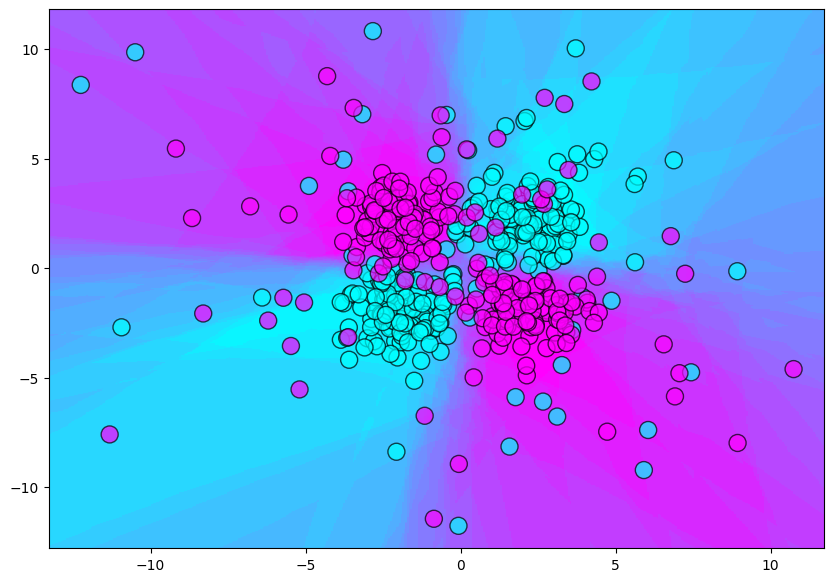

In [22]:
xx, yy = get_grid(X)
X_in=np.hstack((np.reshape(xx,(np.size(xx),1)), np.reshape(yy,(np.size(yy),1))))
#X_in=np.c_[xx.ravel(), yy.ravel()]
predicted = clf.predict_proba(X_in)[:, 1].reshape(xx.shape)
pl.figure(figsize=(10, 7))
pl.pcolormesh(xx, yy, predicted, cmap='cool')
pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='cool', edgecolors='black',alpha=0.7)

In [24]:
def plot_model(X, y, clf):
    clf.fit(X, y)
    xx, yy = get_grid(X)
    predicted = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1].reshape(xx.shape)
    pl.figure(figsize=(10, 7))
    pl.pcolormesh(xx, yy, predicted, cmap='winter')
    pl.scatter(X[:, 0], X[:, 1], c=y, s=150, cmap='winter',edgecolors='black', alpha=0.7)

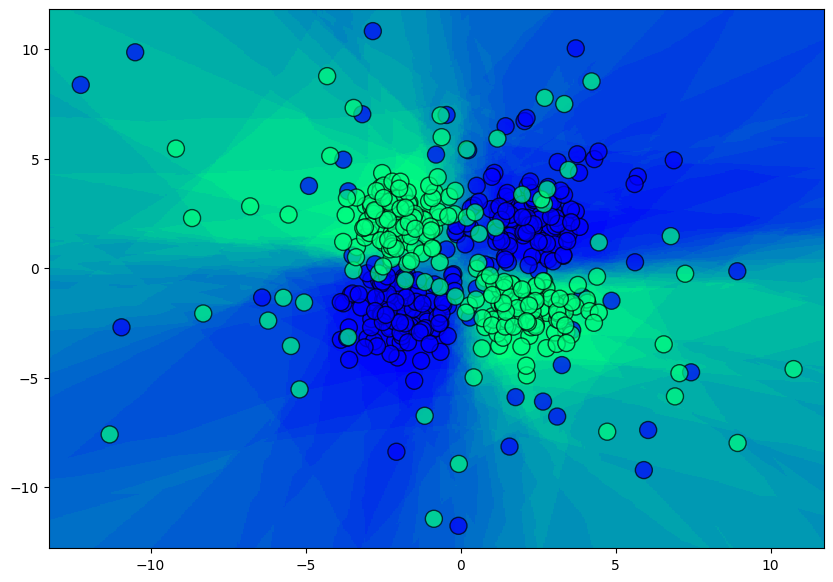

In [23]:
plot_model(X, y, KNN(n_neighbors=25))

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(350, 2) (150, 2) (350,) (150,)


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, KNN(n_neighbors=25).fit(X_train, y_train).predict(X_test))

0.86

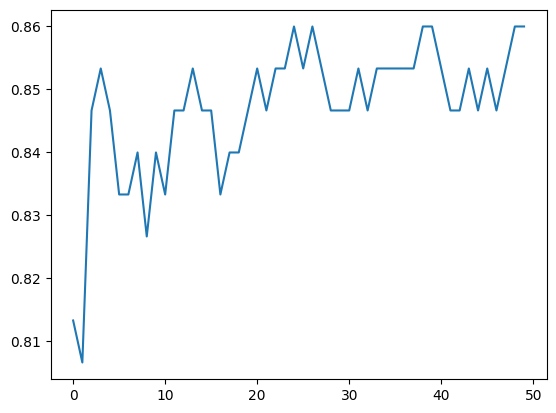

In [36]:
scores = []
for k in range(1, 51):
    scores.append(accuracy_score(y_test, KNN(n_neighbors=k).fit(X_train, y_train).predict(X_test)))
pl.plot(scores)

In [40]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': range(1, 101)}
grid_searcher = GridSearchCV(clf, params, cv=20)
grid_searcher.fit(X, y)

GridSearchCV(cv=20, estimator=KNeighborsClassifier(n_neighbors=25),
             param_grid={'n_neighbors': range(1, 101)})

In [41]:
means = []
stds = []
#for elem in grid_searcher.grid_scores_:
#    means.append(np.mean(elem.cv_validation_scores))
#    stds.append(sqrt(np.var(elem.cv_validation_scores)))
means = np.array(grid_searcher.cv_results_['mean_test_score'])
stds = np.array(grid_searcher.cv_results_['std_test_score'])


Text(0, 0.5, 'Accuracy')

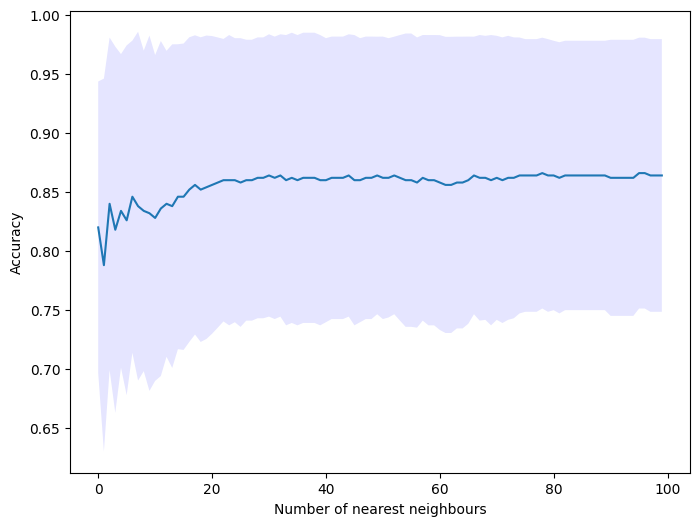

In [42]:
pl.figure(figsize=(8, 6))
pl.plot(means)
pl.fill_between(range(len(means)), means + stds, means - stds, alpha = 0.1, facecolor='blue')
pl.xlabel('Number of nearest neighbours')
pl.ylabel('Accuracy')